In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


# 1. 최종 데이터 불러오기

In [23]:
final_df = pd.read_csv("C:/Users/thoma/Desktop/호진/t_academy/ml프로젝트/데이터/final_df.csv",index_col=0)

# 2. 전처리

## 2-1. result 이상치, 결측치 제거

In [24]:
final_df = final_df.drop(final_df[final_df['result']==0].index)

final_df = final_df.dropna()

## 2-1. 패스 거리 계산

In [25]:
final_df['distance'] = np.sqrt((final_df['x']-final_df['assistX'])**2 + (final_df['y'] -final_df['assistY'])**2)

In [26]:
final_df = final_df[['result','goalTime', 'x', 'y', 'type', 'spId', 'spGrade', 'spLevel', 'spIdType',
       'assist', 'assistSpId', 'assistX', 'assistY', 'hitPost', 'inPenalty',
        'id', 'name', 'season', '포지션', '골 결정력', '슛 파워', '중거리 슛',
       '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '헤더', '점프',
       '침착성', 'distance']]

상관계수 확인 후 너무 작은 특성들 제거

In [6]:
a = final_df.corr()['result']

a[(abs(final_df.corr()['result']) < 0.002)==True]

spLevel     0.001498
spIdType   -0.001643
assistY     0.001619
중거리 슛       0.000373
Name: result, dtype: float64

In [27]:
low_corr = ['spLevel','spIdType','assistY','중거리 슛']

final_df = final_df.drop(low_corr,axis=1)

## 2-2. 라벨 인코딩: True of False 값에 대해 0과 1로 라벨 인코딩 진행 

In [28]:

label = ['assist','hitPost','inPenalty'] # 어시스트 여부 / 골대 여부 / 페널티 에리어 여부

final_df[label] = final_df[label].apply(LabelEncoder().fit_transform)

## 2-3. 모델링에 필요 없는 컬럼 제거

In [29]:
final_df = final_df.drop(['포지션','spId','id','season','assistSpId','name'],axis=1)

## 2-4. 데이터 타입 변환: 정수형을 범주형으로

In [30]:
category = ['type','assist','hitPost','inPenalty']

for i in category:
    
    final_df[i] = final_df[i].astype('category')

## 2-5. 더미 변수 생성

In [31]:
final_df = pd.get_dummies(final_df)

In [32]:
final_df['result'] = final_df['result'].astype('category')

## 2-6. 수치형 데이터 스케일링

In [33]:
scale_list = ['goalTime','x','y','spGrade','assistX','골 결정력', '슛 파워',
       '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '헤더',
       '점프', '침착성','distance']

mm = MinMaxScaler()

mm.fit(final_df[scale_list])

final_df[scale_list] = mm.transform(final_df[scale_list])

## 2-5. 학습을 위해 필요한 컬럼 처리

편의를 위해 컬럼 순서 조정 (result값을 마지막으로)

In [34]:
final_df = final_df[['goalTime', 'x', 'y', 'spGrade', 'assistX',
       '골 결정력', '슛 파워', '위치 선정', '발리 슛', '페널티 킥',
       '프리킥', '커브', '볼 컨트롤', '밸런스', '헤더', '점프', '침착성', 'distance', 'type_1',
       'type_2', 'type_3', 'type_4', 'type_5', 'type_6', 'type_7', 'type_8',
       'type_9', 'type_10', 'assist_0', 'assist_1', 'hitPost_0', 'hitPost_1',
       'inPenalty_0', 'inPenalty_1','result']]

In [35]:
final_df.to_csv('for_modeling.csv')

# 3. 데이터 셋 분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1],final_df['result'],test_size=0.25,stratify=final_df['result'], random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, stratify = y_test, random_state=1)

In [16]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("X_val ", X_val.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)
print("y_val ", y_val.shape)

X_train  (463644, 34)
X_test  (108183, 34)
X_val  (46365, 34)
y_train  (463644,)
y_test  (108183,)
y_val  (46365,)


# 4. 모델 생성 및 학습 및 성능 지표

## 4-1. Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(criterion='gini', n_estimators=252, max_depth=63, max_leaf_nodes=994, max_features=33, min_samples_leaf= 18)

model1.fit(X_train,y_train)

pred1 = model1.predict(X_val)

pred1_test = model1.predict(X_test)

In [47]:
X_train.columns

Index(['goalTime', 'x', 'y', 'spGrade', 'spLevel', 'assistX', 'assistY',
       '골 결정력', '슛 파워', '중거리 슛', '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브',
       '볼 컨트롤', '밸런스', '헤더', '점프', '침착성', 'distance', 'type_1', 'type_2',
       'type_3', 'type_4', 'type_5', 'type_6', 'type_7', 'type_8', 'type_9',
       'type_10', 'assist_0', 'assist_1', 'hitPost_0', 'hitPost_1',
       'inPenalty_0', 'inPenalty_1'],
      dtype='object')

Validation Set 성능

In [23]:
print("Accuracy Score of RandomForest Classifier = ", accuracy_score(y_val, pred1))
print("precision_score of RandomForest Classifier = ", precision_score(y_val, pred1, average='macro'))
print("recall_score of RandomForest Classifier = ", recall_score(y_val, pred1, average='macro'))

Accuracy Score of RandomForest Classifier =  0.5818181818181818
precision_score of RandomForest Classifier =  0.5728132041183612
recall_score of RandomForest Classifier =  0.5344197678149994


Test Set 성능

In [24]:
print("Accuracy Score of RandomForest Classifier = ", accuracy_score(y_test, pred1_test))
print("precision_score of RandomForest Classifier = ", precision_score(y_test, pred1_test, average='macro'))
print("recall_score of RandomForest Classifier = ", recall_score(y_test, pred1_test, average='macro'))

Accuracy Score of RandomForest Classifier =  0.5800264366859857
precision_score of RandomForest Classifier =  0.5714041288208771
recall_score of RandomForest Classifier =  0.5324541563174906


Feature Importance

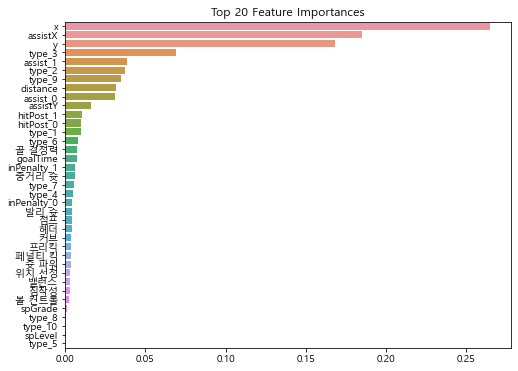

In [25]:
ftr_importances_values = model1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:len(X_train.columns)]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 4-2. XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

model2 = XGBClassifier(booster='gbtree', n_estimators= 106, learning_rate=0.027187649961799516, max_depth=33, subsample=0.9, colsample_bytree=0.7000000000000001, colsample_bylevel=0.865584471569699, colsample_bynode=0.8851539508192925, reg_alpha=0.01363225382508013, reg_lambda=0.05583158097593165, min_child_weight=4, gamma=0.10848813150330286)

le = LabelEncoder()

y_train = le.fit_transform(y_train)

model2.fit(X_train, y_train)

pred2_val = model2.predict(X_val)

pred2_test = model2.predict(X_test)

Feature Importance

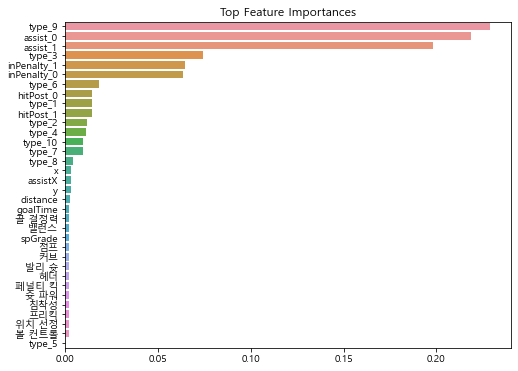

In [19]:
ftr_importances_values = model2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:len(X_train.columns)]

plt.figure(figsize=(8,6))
plt.title('Top Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### Feature Importance가 우리의 모델에 적합하지 않으므로 해당 모델 배제

Validation Set 성능

In [20]:
le = LabelEncoder()
y_val = le.fit_transform(y_val)

print("Accuracy Score of XGB Classifier = ", accuracy_score(y_val, pred2_val))
print("precision_score of XGB Classifier = ", precision_score(y_val, pred2_val, average='macro'))
print("recall_score of XGB Classifier = ", recall_score(y_val, pred2_val, average='macro'))

Accuracy Score of XGB Classifier =  0.6110212444732017
precision_score of XGB Classifier =  0.6094564068835719
recall_score of XGB Classifier =  0.5684097090632411


Test Set 성능

In [21]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

print("Accuracy Score of XGB Classifier = ", accuracy_score(y_test, pred2_test))
print("precision_score of XGB Classifier = ", precision_score(y_test, pred2_test, average='macro'))
print("recall_score of XGB Classifier = ", recall_score(y_test, pred2_test, average='macro'))

Accuracy Score of XGB Classifier =  0.6119538189918934
precision_score of XGB Classifier =  0.6105900438822928
recall_score of XGB Classifier =  0.5692873198594652


## 4-3. Lightgbm Classifier

In [32]:
import lightgbm as lgb

model3 = lgb.LGBMClassifier(boosting_type='gbdt',
 learning_rate=0.09002141442858189,
 num_leaves=221,
 n_estimators=474,
 feature_fraction=0.7562132055169477,
 bagging_fraction=0.723673336137023,
 bagging_freq=7,
 max_depth=13,
 reg_alpha=0.050241390899868774,
 subsample=0.95,
 subsample_freq=23,
 colsample_bytree=0.55,
 min_child_samples=16,
lambda_l1=0.00011779203373800329,lambda_l2=2.851082424059612)

model3.fit(X_train, y_train)

pred3_val = model3.predict(X_val)

pred3_test = model3.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7562132055169477, colsample_bytree=0.55 will be ignored. Current value: feature_fraction=0.7562132055169477
[LightGBM] [Warning] lambda_l1 is set=0.00011779203373800329, reg_alpha=0.050241390899868774 will be ignored. Current value: lambda_l1=0.00011779203373800329
[LightGBM] [Warning] bagging_fraction is set=0.723673336137023, subsample=0.95 will be ignored. Current value: bagging_fraction=0.723673336137023
[LightGBM] [Warning] lambda_l2 is set=2.851082424059612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.851082424059612
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=23 will be ignored. Current value: bagging_freq=7


Validation Set 성능

In [33]:
print("Accuracy Score of LGBM Classifier = ", accuracy_score(y_val, pred3_val))
print("precision_score of LGBM Classifier = ", precision_score(y_val, pred3_val, average='macro'))
print("recall_score of LGBM Classifier = ", recall_score(y_val, pred3_val, average='macro'))

Accuracy Score of LGBM Classifier =  0.5856572845896689
precision_score of LGBM Classifier =  0.5773871537952632
recall_score of LGBM Classifier =  0.5408270936708287


Test Set 성능

In [34]:
print("Accuracy Score of LGBM Classifier = ", accuracy_score(y_test, pred3_test))
print("precision_score of LGBM Classifier = ", precision_score(y_test, pred3_test, average='macro'))
print("recall_score of LGBM Classifier = ", recall_score(y_test, pred3_test, average='macro'))

Accuracy Score of LGBM Classifier =  0.5885120582716323
precision_score of LGBM Classifier =  0.5812686665786139
recall_score of LGBM Classifier =  0.5432779550788519


Feature Importance

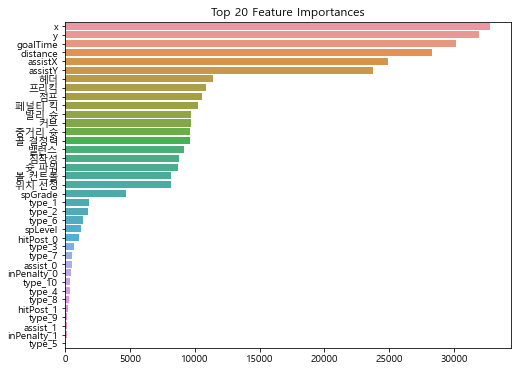

In [35]:
ftr_importances_values = model3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:len(X_train.columns)]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 4-4. AdaBoost Classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier

model4 = AdaBoostClassifier(n_estimators=467, learning_rate=0.098120551302354)

model4.fit(X_train,y_train)

pred4_val = model4.predict(X_val)

pred4_test = model4.predict(X_test)

Validation Set 성능

In [37]:
print("Accuracy Score of AdaBoostClassifier = ", accuracy_score(y_val, pred4_val))
print("precision_score of AdaBoostClassifier = ", precision_score(y_val, pred4_val, average='macro'))
print("recall_score of AdaBoostClassifier = ", recall_score(y_val, pred4_val, average='macro'))

Accuracy Score of AdaBoostClassifier =  0.5450447535856788
precision_score of AdaBoostClassifier =  0.5494628538637562
recall_score of AdaBoostClassifier =  0.49078215078939696


Test Set 성능

In [38]:
print("Accuracy Score of AdaBoostClassifier = ", accuracy_score(y_test, pred4_test))
print("precision_score of AdaBoostClassifier = ", precision_score(y_test, pred4_test, average='macro'))
print("recall_score of AdaBoostClassifier = ", recall_score(y_test, pred4_test, average='macro'))

Accuracy Score of AdaBoostClassifier =  0.545159590693547
precision_score of AdaBoostClassifier =  0.5481044344348168
recall_score of AdaBoostClassifier =  0.4895506083785058


Feature Importance

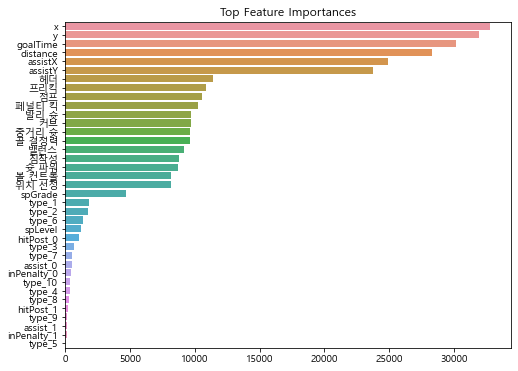

In [40]:
ftr_importances_values = model3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:len(X_train.columns)]

plt.figure(figsize=(8,6))
plt.title('Top Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## 4-5. Voting Classifier

In [44]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('rf',model1),('xg',model2),('lg',model3)],voting='soft')

vc.fit(X_train, y_train)

pred5_val = vc.predict(X_val)

pred5_test = vc.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7562132055169477, colsample_bytree=0.55 will be ignored. Current value: feature_fraction=0.7562132055169477
[LightGBM] [Warning] lambda_l1 is set=0.00011779203373800329, reg_alpha=0.050241390899868774 will be ignored. Current value: lambda_l1=0.00011779203373800329
[LightGBM] [Warning] bagging_fraction is set=0.723673336137023, subsample=0.95 will be ignored. Current value: bagging_fraction=0.723673336137023
[LightGBM] [Warning] lambda_l2 is set=2.851082424059612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.851082424059612
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=23 will be ignored. Current value: bagging_freq=7


In [46]:
print("Accuracy Score of AdaBoostClassifier = ", accuracy_score(y_val, pred5_val))
print("precision_score of AdaBoostClassifier = ", precision_score(y_val, pred5_val, average='macro'))
print("recall_score of AdaBoostClassifier = ", recall_score(y_val, pred5_val, average='macro'))

Accuracy Score of AdaBoostClassifier =  0.5992451202415615
precision_score of AdaBoostClassifier =  0.5970278471941008
recall_score of AdaBoostClassifier =  0.55233721230364


In [45]:
print("Accuracy Score of Voting Classifier = ", accuracy_score(y_test, pred5_test))
print("precision_score of Voting Classifier = ", precision_score(y_test, pred5_test, average='macro'))
print("recall_score of Voting Classifier = ", recall_score(y_test, pred5_test, average='macro'))

Accuracy Score of Voting Classifier =  0.6011942726676095
precision_score of Voting Classifier =  0.5995642914269832
recall_score of Voting Classifier =  0.5540039842388199
